## Q1
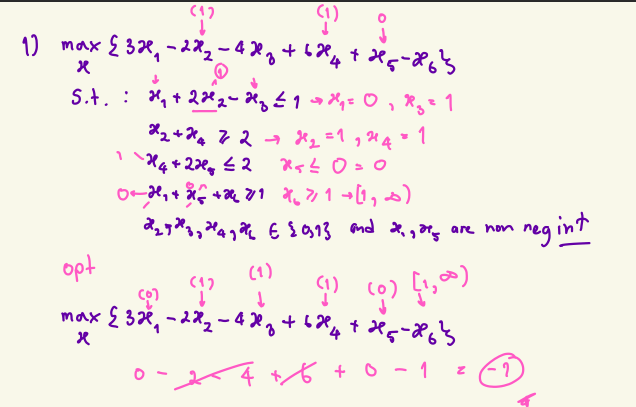

## Q2
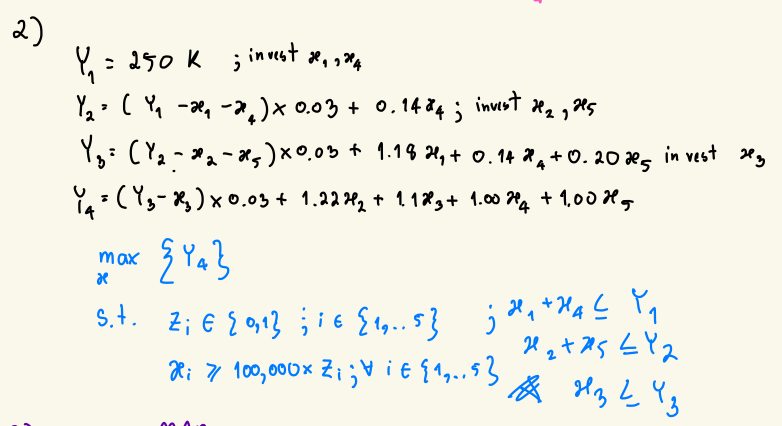

In [9]:
from amplpy import AMPL, Environment

# Define the AMPL model
model = """
param Y1 := 250000;

var x{1..5} >= 0;
var z{1..5} binary;

subject to con1: x[1] + x[4] <= Y1;
subject to con2: x[2] + x[5] <= (Y1 - x[1] - x[4]) * 0.03 + 0.14 * x[4];
subject to con3: x[3] <= ((Y1 - x[1] - x[4]) * 0.03 + 0.14 * x[4] - x[2] - x[5]) * 0.03 + 1.18 * x[1] + 0.14 * x[4] + 0.2 * x[5];

subject to con4{i in 1..5}: x[i] >= 100000 * z[i];

maximize obj: (((Y1 - x[1] - x[4]) * 0.03 + 0.14 * x[4] - x[2] - x[5]) * 0.03 + 1.18 * x[1] + 0.14 * x[4] + 0.2 * x[5] - x[3]) * 0.03 + 1.22 * x[2] + 1.1 * x[3] + x[4] + x[5];
"""

# Initialize AMPL environment
ampl = AMPL()

# Load the model into AMPL
ampl.eval(model)

# Choose a solver, for instance, 'cplex'
ampl.setOption('solver', 'gurobi')

# Solve the problem
ampl.solve()

# Display the results
print("Objective value:", ampl.getObjective('obj').value())
for i in range(1, 6):
    print(f"x[{i}] =", ampl.getVariable('x').get(i).value())
    print(f"z[{i}] =", ampl.getVariable('z').get(i).value())



Gurobi 10.0.3:Gurobi 10.0.3: optimal solution; objective 331200
0 simplex iterations
 
Objective value: 331200.0
x[1] = 0.0
z[1] = 0.0
x[2] = 0.0
z[2] = 0.0
x[3] = 42000.0
z[3] = 0.0
x[4] = 250000.0
z[4] = 0.0
x[5] = 35000.00000000001
z[5] = 0.0


## Q3
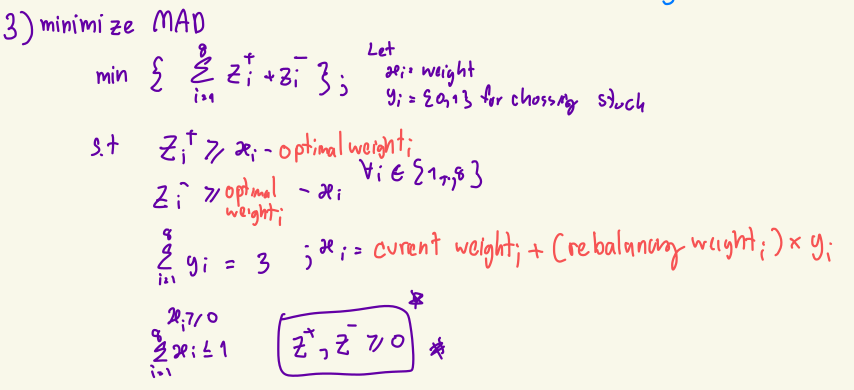